# Importing libraries

In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset

In [6]:
df = pd.read_csv('pakwheels_used_car_data_v02.csv')
df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


# Dataset properties

In [7]:
df.shape

(77878, 14)

In [8]:
df.dtypes

addref            int64
city             object
assembly         object
body             object
make             object
model            object
year            float64
engine          float64
transmission     object
fuel             object
color            object
registered       object
mileage           int64
price           float64
dtype: object

In [9]:
df.columns

Index(['addref', 'city', 'assembly', 'body', 'make', 'model', 'year', 'engine',
       'transmission', 'fuel', 'color', 'registered', 'mileage', 'price'],
      dtype='object')

In [10]:
df.isna().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [11]:
df[['mileage', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,77878.0,9.110919e+04,8.927534e+04,1.0,34000.0,80000.0,123456.0,1000000.0
price,77295.0,3.883232e+06,5.759480e+06,110000.0,1450000.0,2700000.0,4500000.0,529000000.0


# Single features exploration

## Cities

In [12]:
top10_cities = df['city'].value_counts().head(10)
top10_cities

city
Lahore        16674
Karachi       14430
Islamabad     11501
Rawalpindi     5448
Peshawar       3689
Faisalabad     3037
Multan         2347
Gujranwala     1999
Sialkot        1328
Sargodha        879
Name: count, dtype: int64

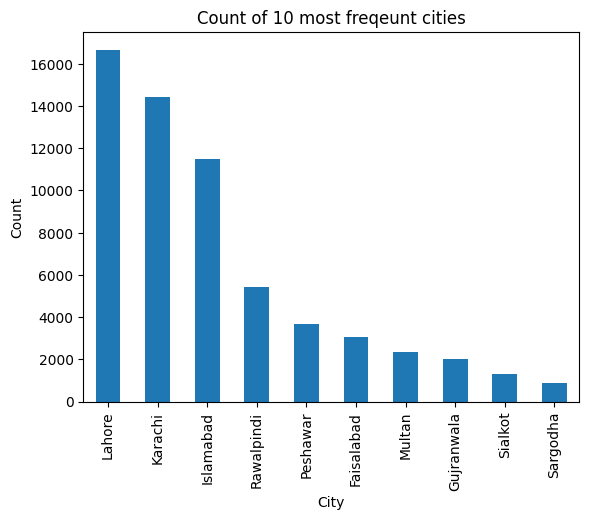

In [13]:
top10_cities.plot(kind = 'bar')
plt.title('Count of 10 most freqeunt cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

## Body type of vehicle

In [14]:
top10_body_type = df['body'].value_counts().head(10)
top10_body_type

body
Sedan            30193
Hatchback        25014
SUV               5087
Crossover         2156
Mini Van          1337
Compact sedan      793
MPV                786
Double Cabin       779
Van                716
Micro Van          539
Name: count, dtype: int64

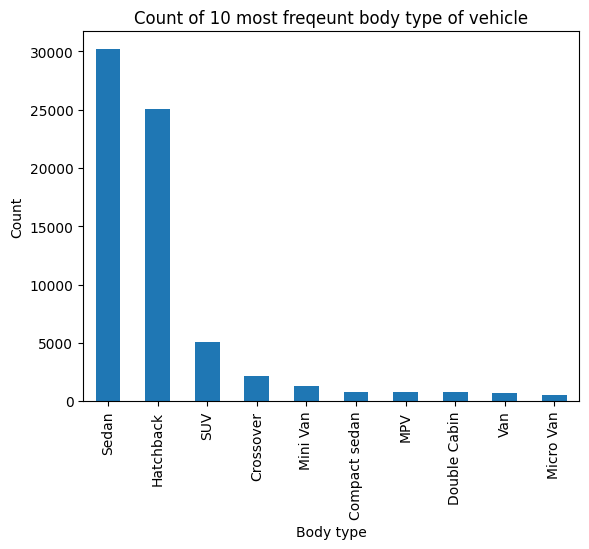

In [15]:
top10_body_type.plot(kind = 'bar')
plt.title('Count of 10 most freqeunt body type of vehicle')
plt.xlabel('Body type')
plt.ylabel('Count')
plt.show()

## Manufacter of vehicle

In [16]:
top10_make = df['make'].value_counts().head(10)
top10_make

make
Toyota        24910
Suzuki        22347
Honda         16428
Daihatsu       3181
KIA            1764
Nissan         1539
Hyundai        1491
Mitsubishi     1101
Changan         942
Mercedes        620
Name: count, dtype: int64

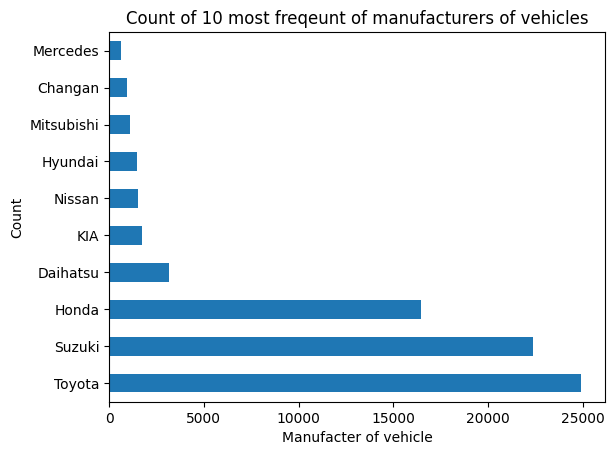

In [17]:
top10_make.plot(kind = 'barh')
plt.title('Count of 10 most freqeunt of manufacturers of vehicles')
plt.xlabel('Manufacter of vehicle')
plt.ylabel('Count')
plt.show()